# Fred Burst, Task 2
## Science
### Part 1- Special lines

Michael Gully-Santiago  
Wednesday, December 2, 2015  


Let's look for scientifically interesting emission lines.

In [1]:
import warnings
warnings.filterwarnings("ignore")
import numpy as np
from astropy.io import fits
import matplotlib.pyplot as plt

In [2]:
% matplotlib inline
% config InlineBackend.figure_format = 'retina'
import seaborn as sns
sns.set_context('notebook')

## Read in all the data.
No spot-checking necessary, since we already did that in the previous notebook.

### IGRINS data of ASASSN15qi

In [3]:
import h5py

In [4]:
f = h5py.File("../data/reduced/ASASSN15qi_IGRINS_K.hdf5", "r")
K = {key:np.array(f[key]) for key in f.keys()}
f.close()

f = h5py.File("../data/reduced/ASASSN15qi_IGRINS_H.hdf5", "r")
H = {key:np.array(f[key]) for key in f.keys()}
f.close()

In [5]:
K['wls'].shape

(25, 2048)

### Telluric absorption

In [6]:
import pandas as pd

In [7]:
tell = pd.read_csv('~/GitHub/plp/master_calib/TelluricModel.dat', sep=' ', names = ['wls', 'trans'])

In [8]:
tell['wls'] = tell['wls'] * 10.0 #convert to angstroms
tell.head()

,wls,trans
0,13999.994558,2.026157e-15
1,14000.024558,1.795465e-15
2,14000.054558,1.657147e-15
3,14000.084558,1.327971e-15
4,14000.114558,1.034897e-15


## Identify interesting lines

Interesting lines:

Line|Wavelength
-|-
Pa$\alpha$|1.87569
Br$\gamma$|2.16612
CO $\nu =2-0$|2.29353
CO $\nu =3-1$|2.32265
Na$~$I|2.20624

## Meta

In [9]:
K_orders, H_orders = pd.DataFrame(), pd.DataFrame()

In [10]:
K_orders['wl_start']=[np.floor(min(wl)) for wl in K['wls']]
K_orders['wl_end']=[np.floor(max(wl)) for wl in K['wls']]
K_orders['band']='K'
H_orders['wl_start']=[np.floor(min(wl)) for wl in H['wls']]
H_orders['wl_end']=[np.floor(max(wl)) for wl in H['wls']]
H_orders['band']='H'

In [11]:
orders = H_orders.append(K_orders)
orders

,wl_start,wl_end,band
0,18092,18346,H
1,17914,18165,H
2,17739,17988,H
3,17568,17815,H
4,17400,17645,H
5,17236,17478,H
6,17075,17315,H
7,16917,17155,H
8,16762,16997,H
9,16610,16843,H


## Plot the favorite lines

In [12]:
sns.set_context('paper', font_scale=1.4)
sns.set_style('ticks')

## Br$\gamma$

In [13]:
line = 21661.2
this_order = (orders.wl_start < line) & (orders.wl_end > line)
m = orders.index[this_order].values

In [14]:
print(m)

[11]


In [15]:
m = 11
wl = K['wls'][m,:]
fl = K['fls'][m,:]

Feature indices

In [16]:
dw = 50
gi = (wl > (line - dw)) & (wl < (line + dw))

Continuum indices

In [17]:
N = len(wl)

In [25]:
cib = (wl > 21600) & (wl < 21625)
cir = (wl > 21700) & (wl < 21750)
ci = cib | cir
cont_level = np.nanmedian(fl[ci])
cont = np.ones(N)*cont_level
sig_cont = np.nanstd(fl[ci])/cont_level
print('The relative uncertainty per pixel is {:.2}%'.format(sig_cont))

The relative uncertainty per pixel is 0.055%


## Calculate the 10% width

In [26]:
this_wl, this_fl = wl[gi], fl[gi]/cont_level
peak = np.nanmax(this_fl)
tph = (peak-1.0)*0.1
#tpw_r = (this_wl < line) & (this_fl <1)


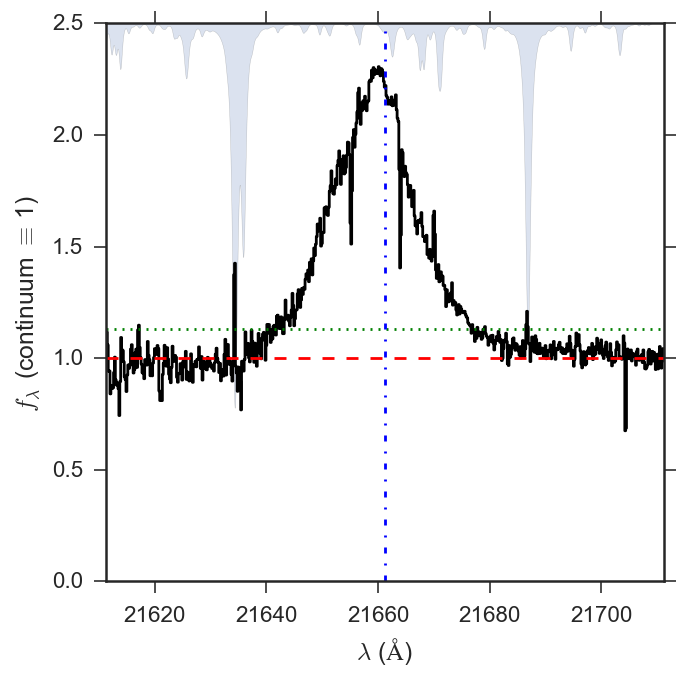

In [39]:
plt.figure(figsize=(5, 5))

plt.step(this_wl, this_fl, 'k')
plt.plot(this_wl,cont[gi]/cont_level, 'r--' )
plt.plot([min(this_wl), max(this_wl)],[1+tph, 1+tph], 'g:' )
#plt.plot(tell.wls, tell.trans*2.5, 'k-', alpha=0.2)
plt.fill_between(tell.wls, tell.trans*2.5, y2=2.5, alpha=0.2)
plt.plot([line, line],[0, 3], 'b-.' )
plt.ylim(0, 2.5)
plt.xlim(min(this_wl), max(this_wl))
plt.xlabel('$\lambda$ ($\AA$)')
plt.ylabel('$f_\lambda$ (continuum $\equiv$ 1)')
plt.gca().get_xaxis().get_major_formatter().set_useOffset(False);